We are using Logistic regression to determine if team and is_outdoors is a predictor
We are using Support Vector Machines to determine if team and is_outdoors is a predictor
------- HOME AND AWAY
---------------
Model Accuracy: 0.5703125
---------------
Confusion Matrix:
[[41 30]
 [25 32]]
---------------
Classification Report
              precision    recall  f1-score   support

           0       0.62      0.58      0.60        71
           1       0.52      0.56      0.54        57

    accuracy                           0.57       128
   macro avg       0.57      0.57      0.57       128
weighted avg       0.57      0.57      0.57       128

------- AWAY ONLY
---------------
Model Accuracy: 0.546875
---------------
Confusion Matrix:
[[13 14]
 [15 22]]
---------------
Classification Report
              precision    recall  f1-score   support

           0       0.46      0.48      0.47        27
           1       0.61      0.59      0.60        37

    accuracy                  

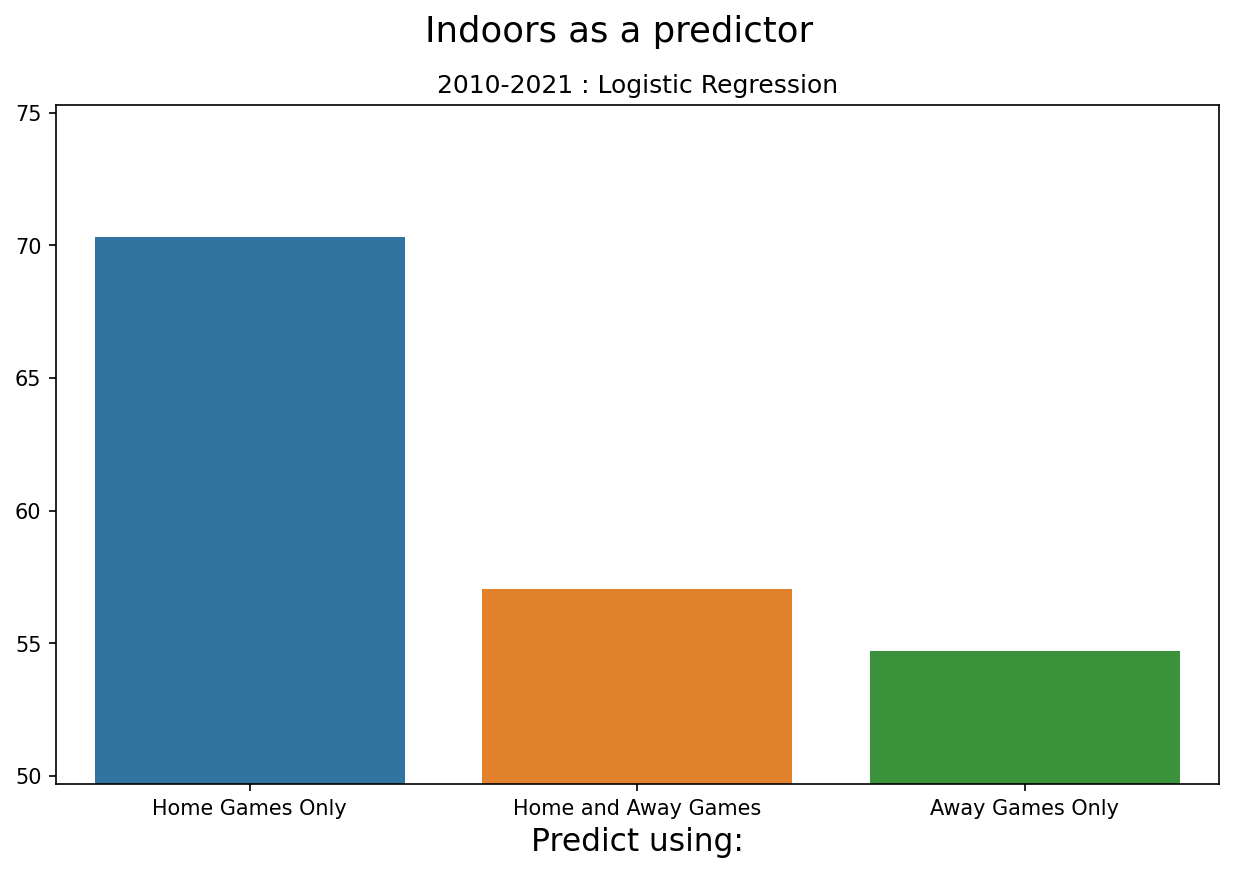

In [1]:
import utils.game_utils as gu

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_results(y_test, y_pred):
  print('---------------')
  acc = accuracy_score(y_test, y_pred)
  print(f"Model Accuracy: {acc}")

  print('---------------')
  print("Confusion Matrix:")
  print(confusion_matrix(y_test, y_pred))

  print('---------------')
  print('Classification Report')
  print(classification_report(y_test, y_pred))
  
def get_searched_model(X_train, y_train):
  log_model = LogisticRegression(solver='saga',multi_class='ovr', max_iter=500)
  param_grid = { 
                'C': np.logspace(0,10,20),
                'penalty': ['l1','l2','elasticnet'],
                'l1_ratio': np.linspace(0,1,20),
                }

  print('running grid search...')
  grid_model = GridSearchCV(log_model,param_grid=param_grid)
  grid_model.fit(X_train, y_train)
  print('Search finished. Best Parameters')
  print(grid_model.best_params_)
  return grid_model
def get_static_model():
  # Having run this once the values were found
  # Use the above to perform full search again.
  log_model = LogisticRegression(solver='saga',
                                  multi_class='ovr', 
                                  max_iter=500,
                                  penalty='l2',
                                  C=428.1332398719391)
  return log_model
def estimate_accuracy(df):
  dum_df = pd.get_dummies(df)
  X = dum_df.drop('win', axis=1)
  y = dum_df['win']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

  model = get_static_model()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  print_results(y_test, y_pred)
  return accuracy_score(y_test, y_pred)
def draw_final_outcomes(acc_home, acc_both, acc_away, algorithm):
  plt.figure(figsize=(10,6), dpi=150)
  percs = pd.Series([acc_home, acc_both, acc_away]) * 100
  sns.barplot(x=['Home Games Only', 'Home and Away Games', 'Away Games Only'], y=percs)
  plt.ylim(percs.min() - 5, percs.max() + 5)
  plt.suptitle('Indoors as a predictor', fontsize=17)
  plt.title(f'2010-2021 : {algorithm}')
  plt.xlabel('Predict using:', fontsize=15)
  plt.show();


data_path = '../../../data'
nfld = gu.NFL_Data(data_path)

print("We are using Logistic regression to determine if team and is_outdoors is a predictor")

data_path = '../../../data'
nfld = gu.NFL_Data(data_path)

print("We are using Support Vector Machines to determine if team and is_outdoors is a predictor")

print('------- HOME AND AWAY')
year_df = gu.get_year(nfld.data(), 2020)
df = year_df[['team','is_outdoors','win']]
acc_both = estimate_accuracy(df)

print('------- AWAY ONLY')
year_df = gu.get_year(nfld.data(), 2020)
df = year_df[year_df['home'] == 0]
df = df[['team','is_outdoors','win']]
acc_away = estimate_accuracy(df)

print('------- HOME ONLY')
year_df = gu.get_year(nfld.data(), 2020)
df = year_df[year_df['home'] == 1]
df = df[['team','is_outdoors','win']]
acc_home = estimate_accuracy(df)

draw_final_outcomes(acc_home, acc_both, acc_away, 'Logistic Regression')